In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('covid.csv')
df.head(10)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
5,2020-01-22,Antigua and Barbuda,0,0,0
6,2020-01-22,Argentina,0,0,0
7,2020-01-22,Armenia,0,0,0
8,2020-01-22,Australia,0,0,0
9,2020-01-22,Austria,0,0,0


In [3]:
df.shape

(23688, 5)

In [4]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

    No null values present

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [6]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


    -The maximum recovered cases are 384902
    -The maximum deaths are 98913
    -There is a large difference between 75th percentile and maximum value of 'Confirmed','Recovered','Deaths'

In [7]:
df=df.drop(['Date','Country'],axis=1)

In [8]:
df['Confirmed'].value_counts()

0         8056
1          799
2          310
3          293
16         223
          ... 
3638         1
110130       1
17967        1
1559         1
3958         1
Name: Confirmed, Length: 5308, dtype: int64

In [9]:
df['Deaths'].value_counts()

0        12989
1         1244
2          655
3          550
4          324
         ...  
473          1
4603         1
521          1
2600         1
30689        1
Name: Deaths, Length: 1768, dtype: int64

In [10]:
df['Recovered'].value_counts()

0         11100
1           866
2           517
4           264
3           262
          ...  
4869          1
41731         1
361239        1
8063          1
6141          1
Name: Recovered, Length: 3303, dtype: int64

    There are many countries with zero confirmed cases and so they can be dropped from the dataset as it is obvious that the country with zero confirmed cases will have zero deaths.

In [11]:
df['Confirmed']=df['Confirmed'].replace(0,np.NaN)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  15632 non-null  float64
 1   Recovered  23688 non-null  int64  
 2   Deaths     23688 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 555.3 KB


In [13]:
df=df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15632 entries, 36 to 23687
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  15632 non-null  float64
 1   Recovered  15632 non-null  int64  
 2   Deaths     15632 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 488.5 KB


In [15]:
df.describe()

,Confirmed,Recovered,Deaths
count,1.563200e+04,15632.000000,15632.000000
mean,1.207641e+04,3912.341287,798.492643
std,7.157127e+04,18501.152785,4893.088211
min,1.000000e+00,0.000000,0.000000
25%,1.900000e+01,1.000000,0.000000
50%,2.780000e+02,32.000000,5.000000
75%,2.200000e+03,534.000000,51.000000
max,1.680913e+06,384902.000000,98913.000000


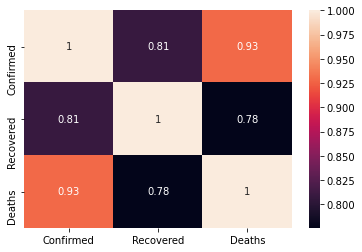

In [16]:
corr=df.corr()
sn.heatmap(corr,annot=True)

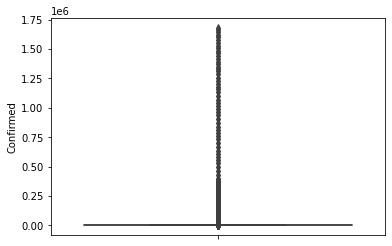

In [38]:
sn.boxplot(df['Confirmed'],orient='v')

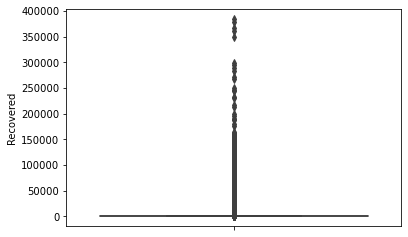

In [39]:
sn.boxplot(df['Recovered'],orient='v')

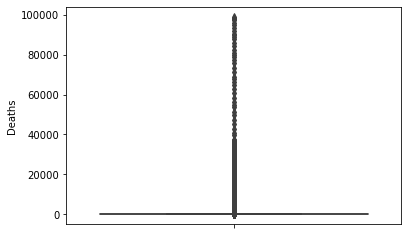

In [40]:
sn.boxplot(df['Deaths'],orient='v')

In [17]:
#Removing outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
df1.shape, df.shape

((15176, 3), (15632, 3))

In [18]:
df1.skew()

Confirmed    6.120025
Recovered    6.462332
Deaths       8.324282
dtype: float64

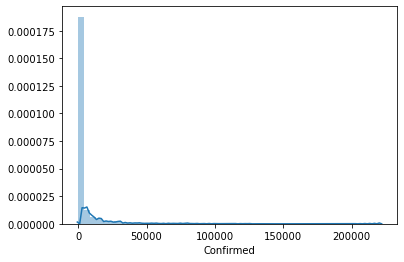

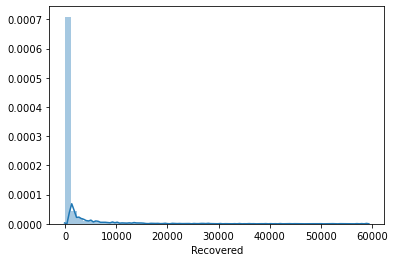

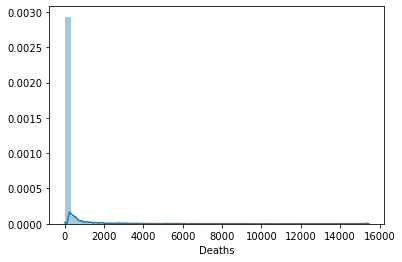

In [19]:
for col in df1.describe().columns:
    sn.distplot(df1[col])
    plt.show()

In [21]:
#Removing skewness from all the columns
df1['Confirmed']=np.log1p(df1['Confirmed'])
df1['Recovered']=np.log1p(df1['Recovered'])
df1['Deaths']=np.log1p(df1['Deaths'])
df1.skew()

Confirmed    0.102100
Recovered    0.370095
Deaths       0.903752
dtype: float64

In [22]:
x=df1.drop(['Deaths'],axis=1)
y=df1['Deaths']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

In [26]:
best_rstate=0
accu=0
for i in range(0,200):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
    lg=SVR()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    temp_acc=r2_score(test_y,pred)
    if temp_acc>accu:
        accu=temp_acc
        best_rstate=i

print(f'Best accuracy {accu*100} found on random_state {best_rstate}')

Best accuracy 88.8590149607135 found on random_state 196


In [27]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=196)

models=[LinearRegression(),SVR(),SVR(kernel='linear'),SVR(kernel='poly'),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor()]
for m in models:
    m.fit(train_x,train_y)
    predm=m.predict(test_x)
    cvscore=cvscore=cross_val_score(m,x,y,cv=5)
    print(m)
    print('r2_score', r2_score(test_y,predm))
    print('cv_score', cvscore.mean())
    print('MAE:',mean_absolute_error(test_y,predm))
    print('MSE:',mean_squared_error(test_y,predm))
    print('RMSE:',np.sqrt(mean_squared_error(test_y,predm)))
    print('\n')

LinearRegression()
r2_score 0.8176434490997306
cv_score 0.6734003299650988
MAE: 0.7905420002522725
MSE: 0.9696740216687435
RMSE: 0.9847202758493112


SVR()
r2_score 0.8885901496071349
cv_score 0.8320906678330184
MAE: 0.567472540918361
MSE: 0.5924176408833524
RMSE: 0.7696867160626799


SVR(kernel='linear')
r2_score 0.815504181885986
cv_score 0.663108179745741
MAE: 0.7809456729423186
MSE: 0.9810494936895454
RMSE: 0.9904794261818594


SVR(kernel='poly')
r2_score 0.8495516198501044
cv_score 0.7695874254612238
MAE: 0.6569492837990738
MSE: 0.8000035376479682
RMSE: 0.894429168603064


RandomForestRegressor()
r2_score 0.8949525600672129
cv_score 0.7857473987006047
MAE: 0.49257844367882064
MSE: 0.5585857653193911
RMSE: 0.747385954724459


AdaBoostRegressor()
r2_score 0.8697173860314853
cv_score 0.8050848826991329
MAE: 0.6629425755693807
MSE: 0.6927728431837737
RMSE: 0.8323297682912547


GradientBoostingRegressor()
r2_score 0.8958169856462054
cv_score 0.8335907010353459
MAE: 0.5676620326375178
M

In [30]:
parameter={'n_estimators':[100,150,250,500],
       'learning_rate':[0.1,0.01,0.001],
      'max_features':['auto','sqrt','log2']}

In [32]:
gcv=GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)
gcv.fit(train_x,train_y)
gcv.best_estimator_
gcv_pred=gcv.best_estimator_.predict(test_x)
print('r2 score', r2_score(test_y,gcv_pred))

r2 score 0.899840183578841


In [33]:
import pickle
file='covid19.pkl'
pickle.dump(gcv,open(file,'wb'))